In [22]:
import pandas as pd
import numpy as np
# show max columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
from utils.exploration import *

In [23]:
df_raw = pd.read_csv('Data\modeling_data.csv')

In [24]:
df = df_raw.copy()

In [25]:
display(df.head(3), df.shape)

,Patient ID,Histologic Type ICD-O-3,Year of diagnosis,Sex,Race,Radiation recode,Age,Marital Status,Chemotherapy,Surgery,T,N,M,Grouped Stage,Tumor Size,Survival Months
0,62012497,8045,2004,Male,White,0,65-69 years,Married,0,0,T2,N2,M1,IV,40,1
1,62010191,8045,2004,Female,White,1,35-49 years,Married,1,1,T2,N2,M0,III,40,97
2,62055106,8045,2004,Female,White,1,35-49 years,Single,1,1,T1,N2,M0,III,30,14


(947, 16)

Mean of Survival Months: 13.34
Median of Survival Months: 9.00
Standard deviation of Survival Months: 16.36
Mode of Survival Months: 0
Number of outliers in Survival Months: 64
Number of extreme outliers in Survival Months: 21


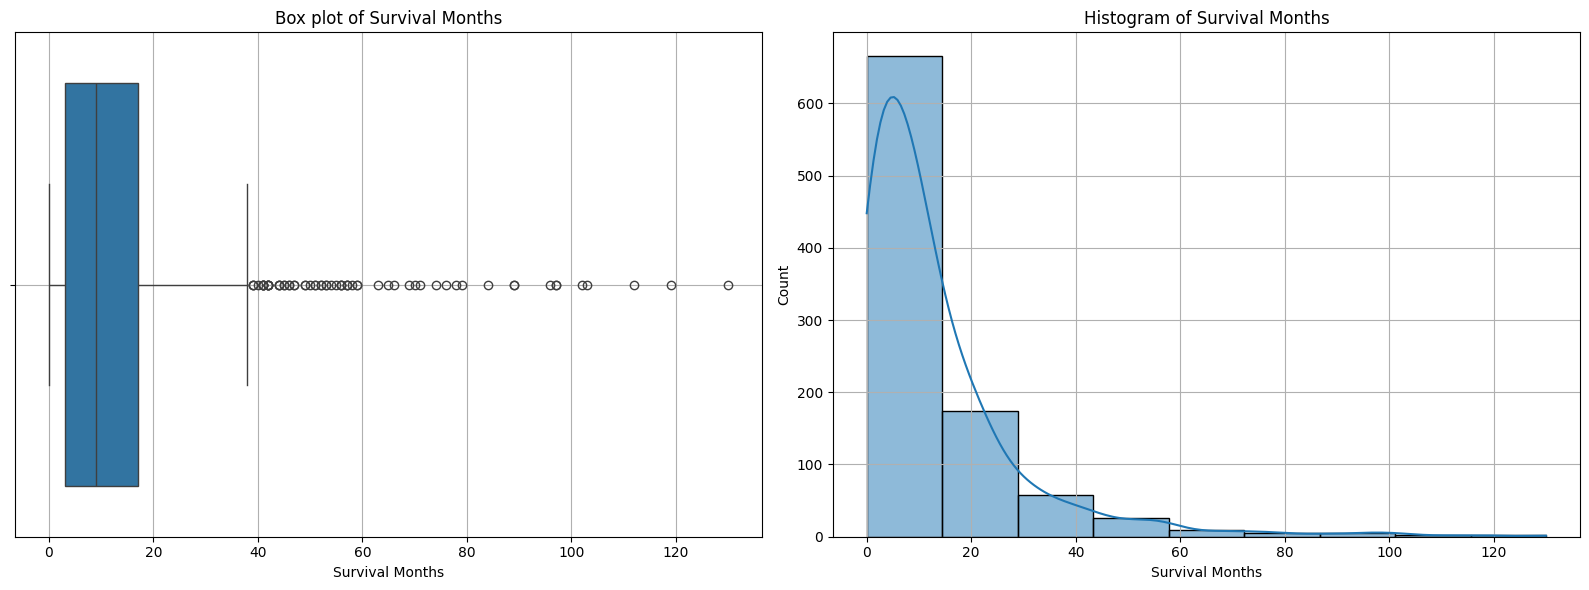

In [26]:
# check Survival Months distribution
data_exploration(df, 'Survival Months')

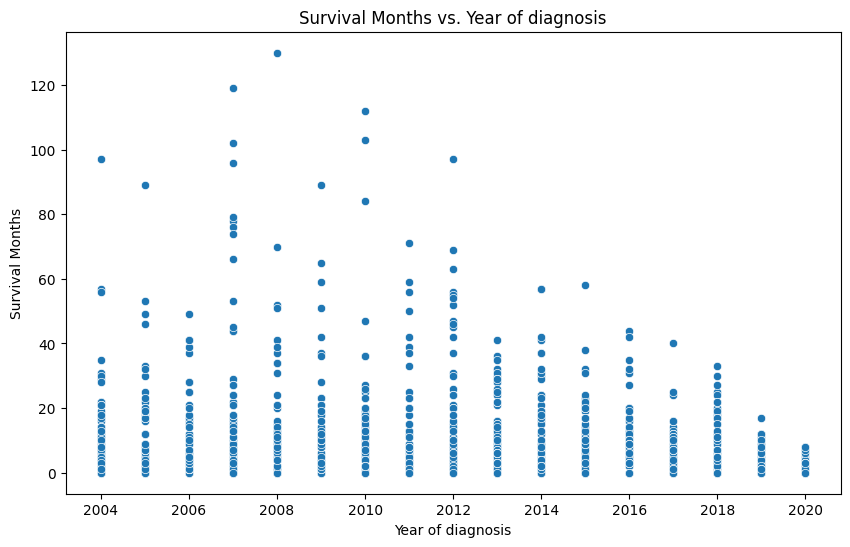

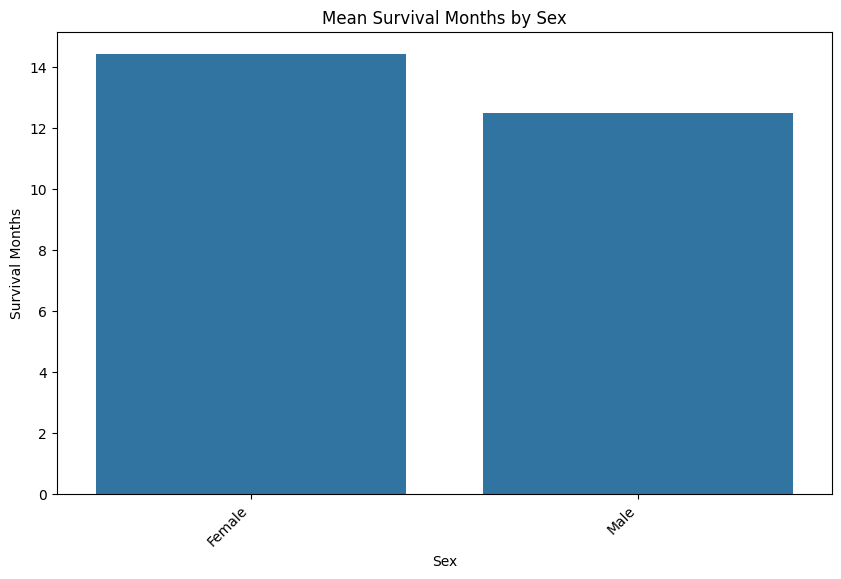

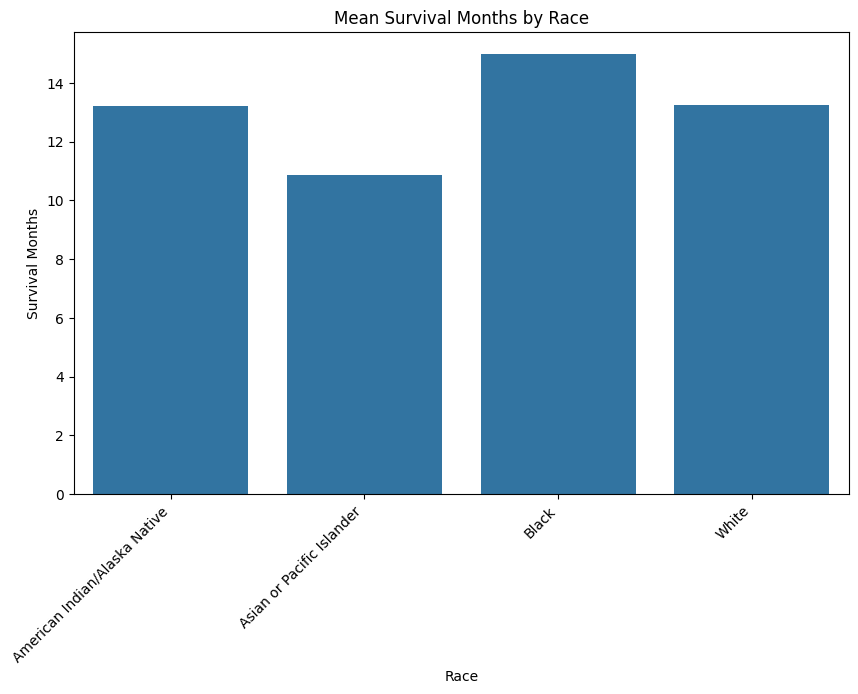

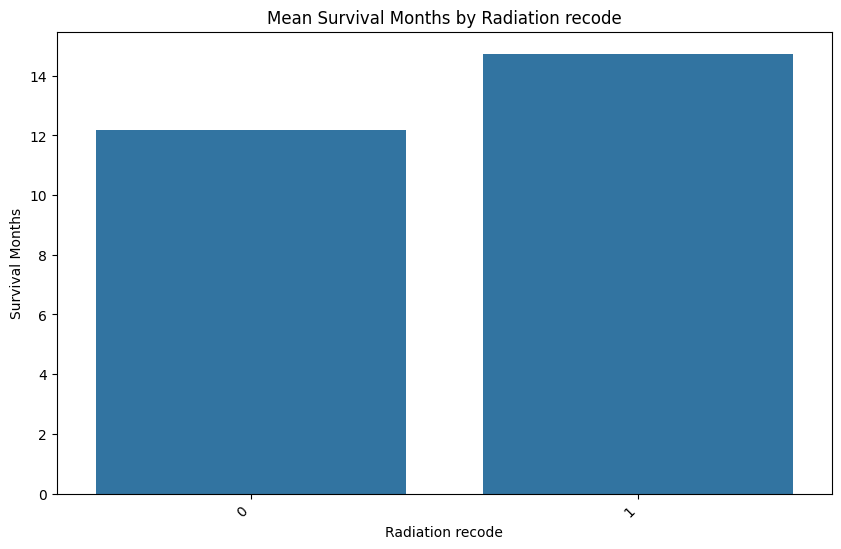

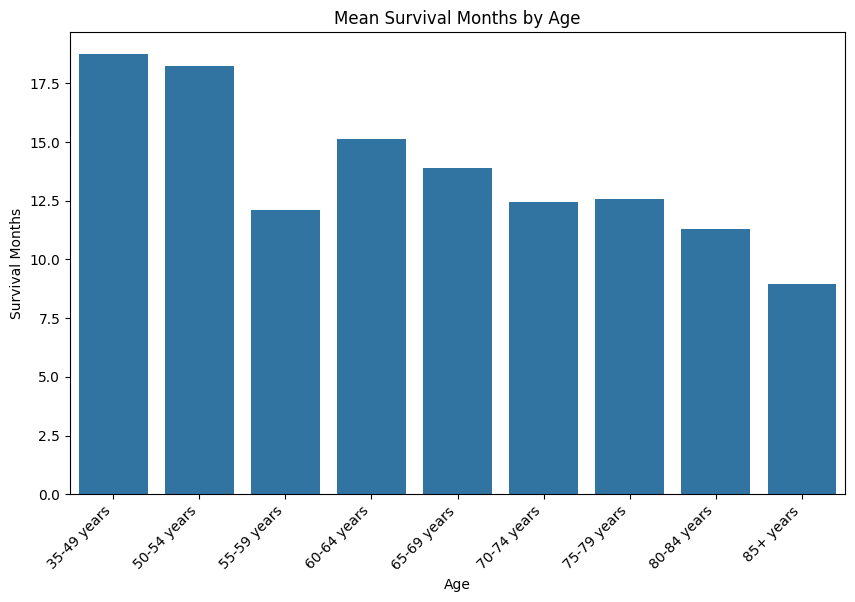

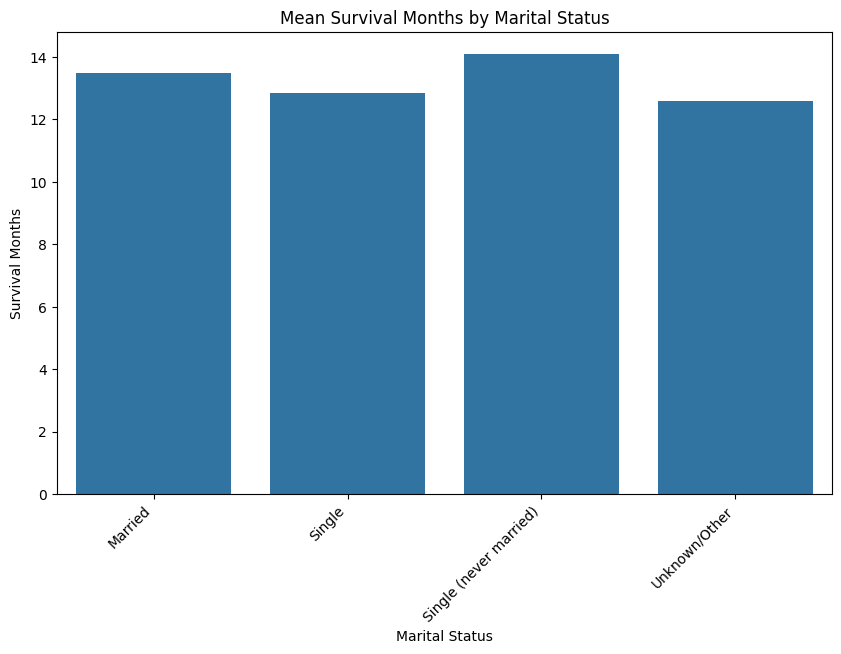

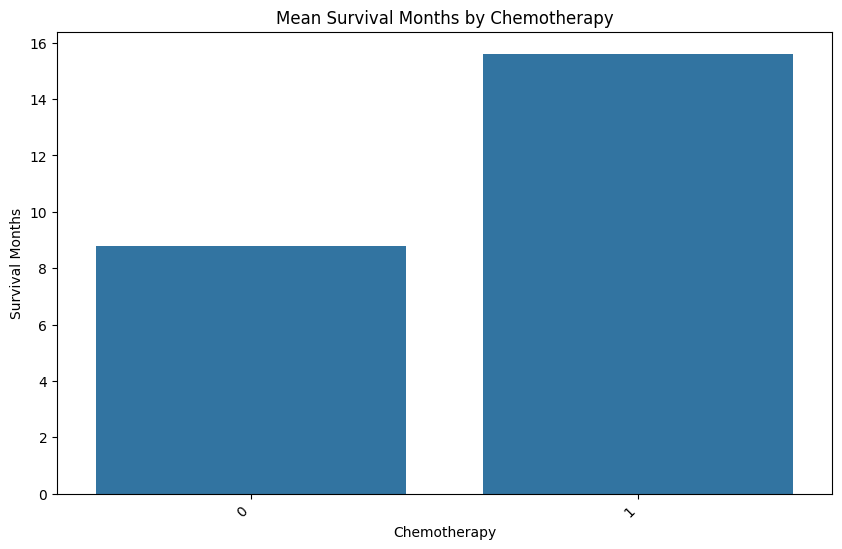

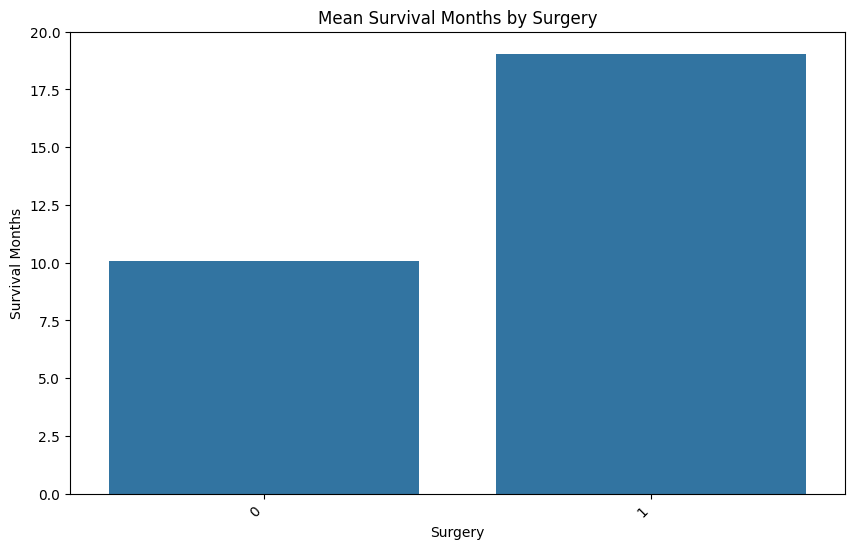

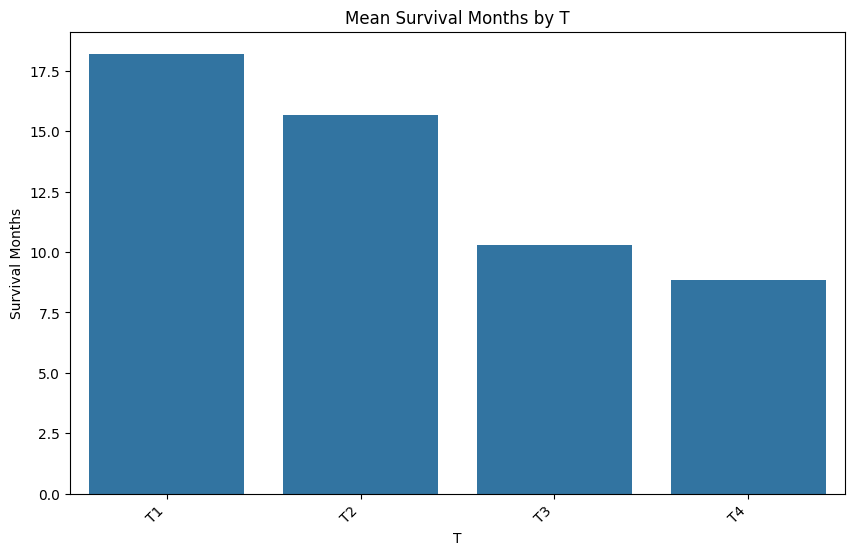

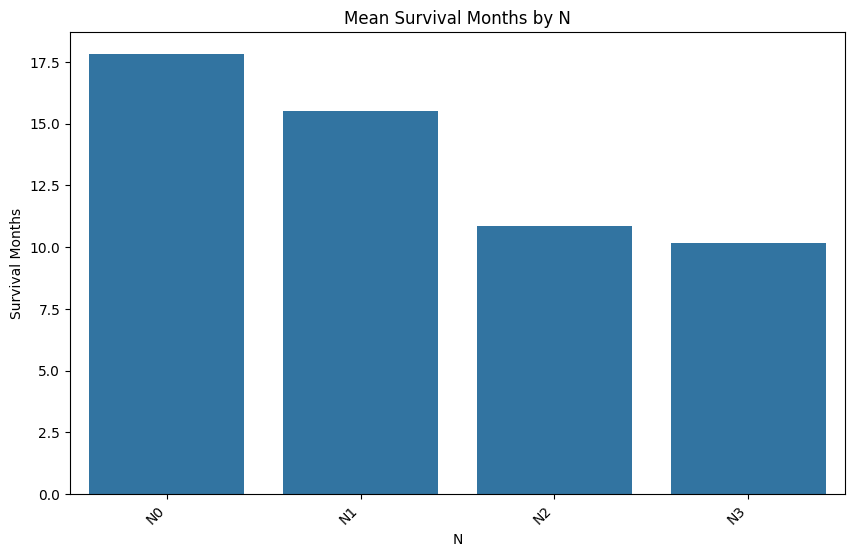

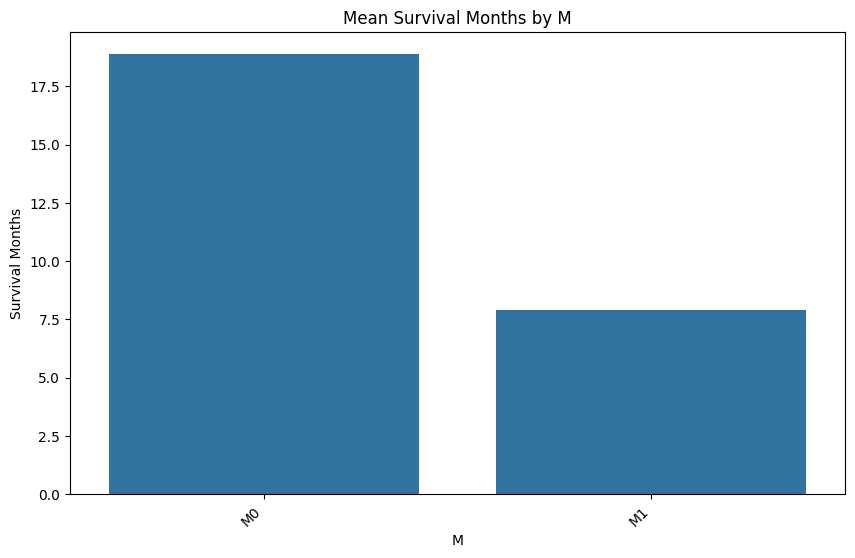

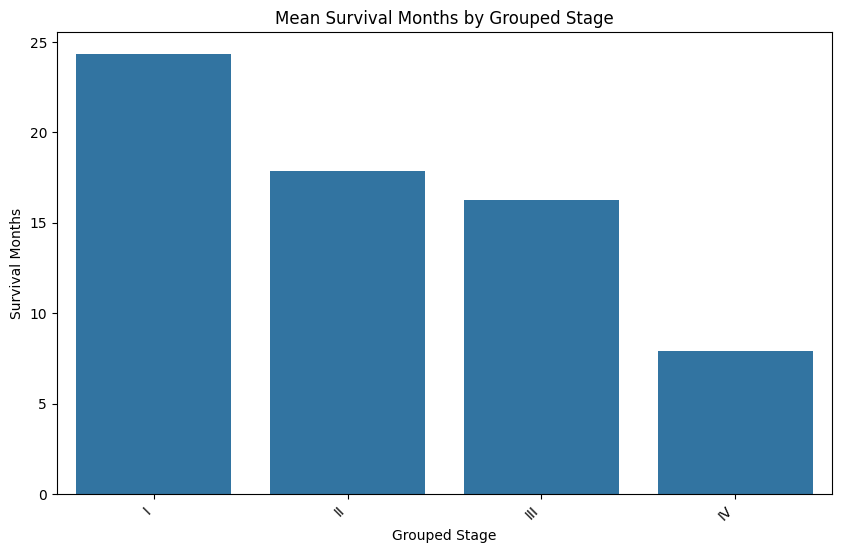

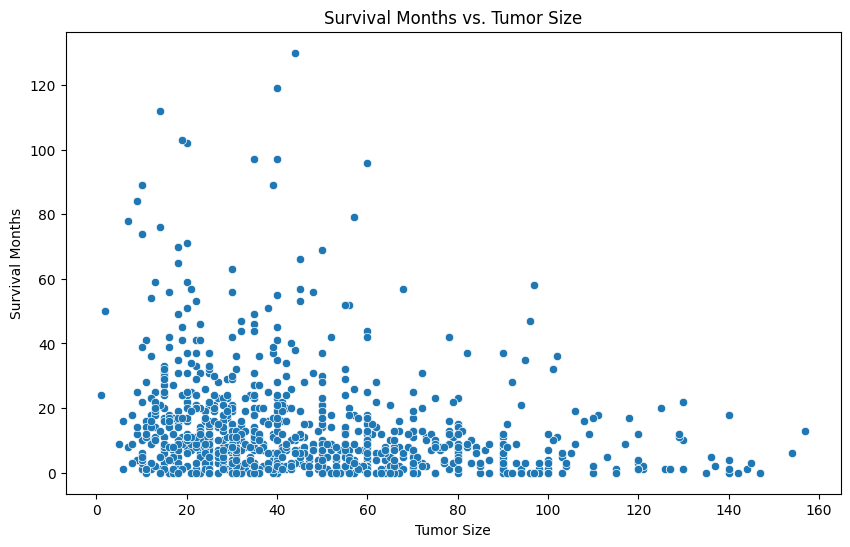

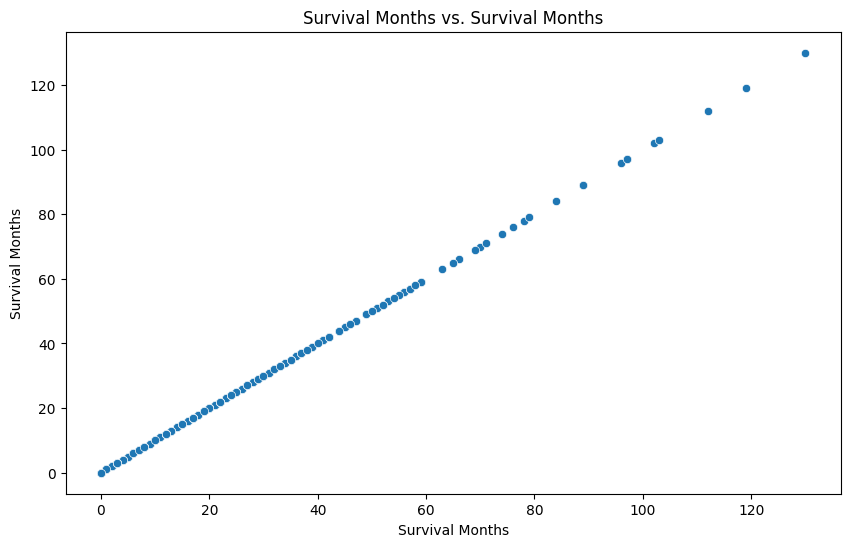

In [27]:
# visualize the mean survival months by each feature
columns_to_exclude = ['Patient ID', 'Histologic Type ICD-O-3']
features = df.drop(columns=columns_to_exclude)

# Plotting
for column in features.columns:
    if df[column].dtype == 'object' or len(df[column].unique()) < 10:  # Basic check for categorical data
        # Calculate mean survival months for each category
        mean_survival = df.groupby(column)['Survival Months'].mean().reset_index()
        
        # Plot
        plt.figure(figsize=(10, 6))
        sns.barplot(x=column, y='Survival Months', data=mean_survival)
        plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability if needed
        plt.title(f'Mean Survival Months by {column}')
        plt.show()

    else:  # For numerical data, you might use scatter plots or line plots
        # This is a simplified approach; you may want to bin the data for clearer insights
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[column], y=df['Survival Months'])
        plt.title(f'Survival Months vs. {column}')
        plt.xlabel(column)
        plt.ylabel('Survival Months')
        plt.show()

In [28]:
# make them two groups, 0-6 and 6+
df['Survival Group'] = df['Survival Months'].apply(lambda x: 0 if x <= 9 else 1)

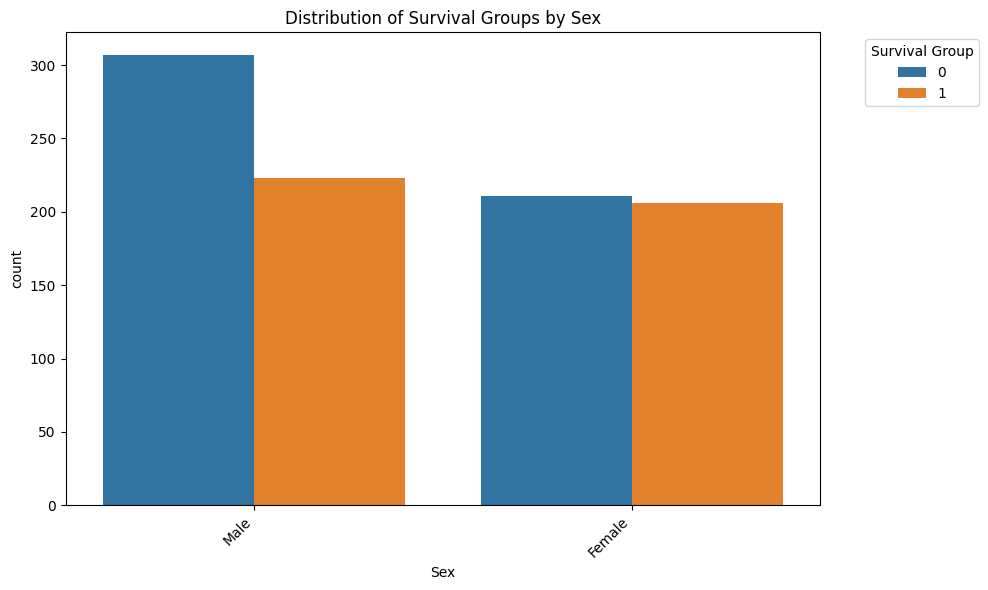

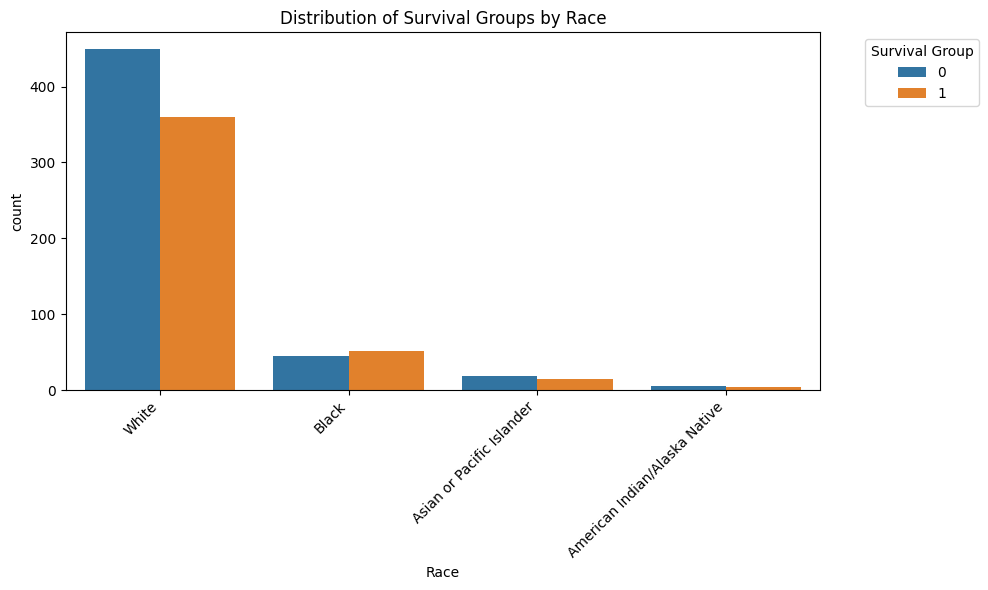

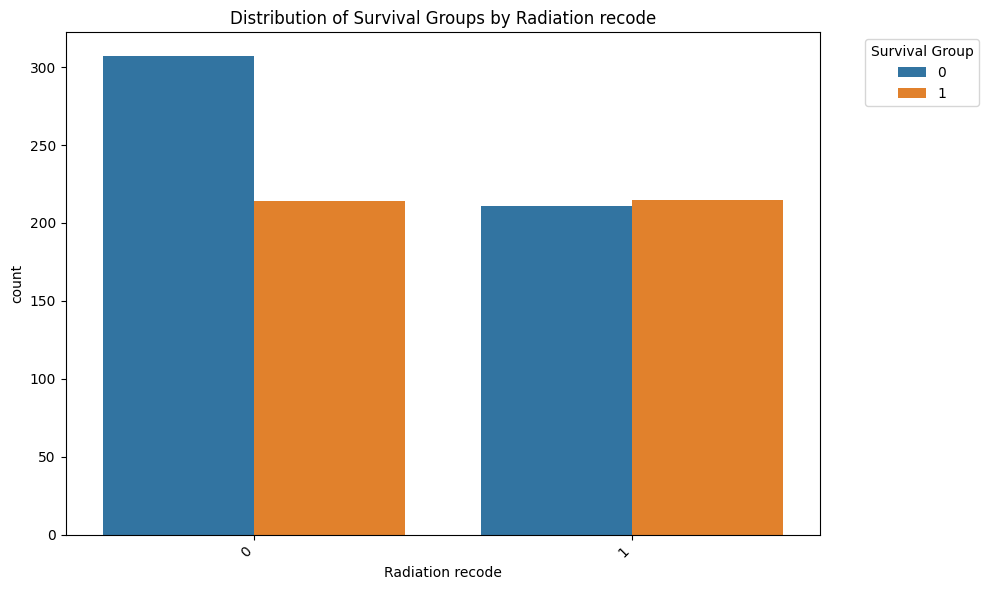

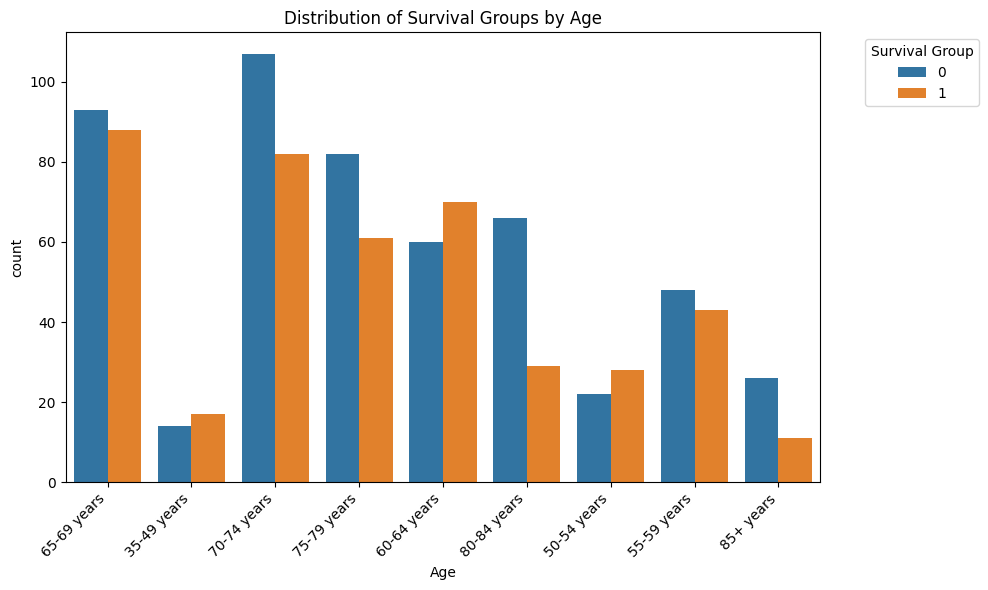

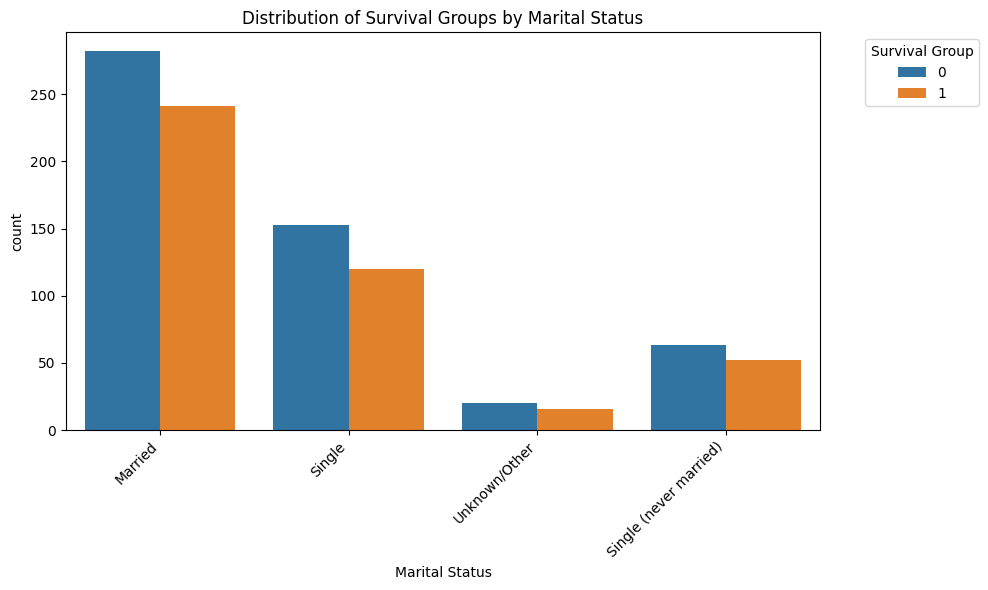

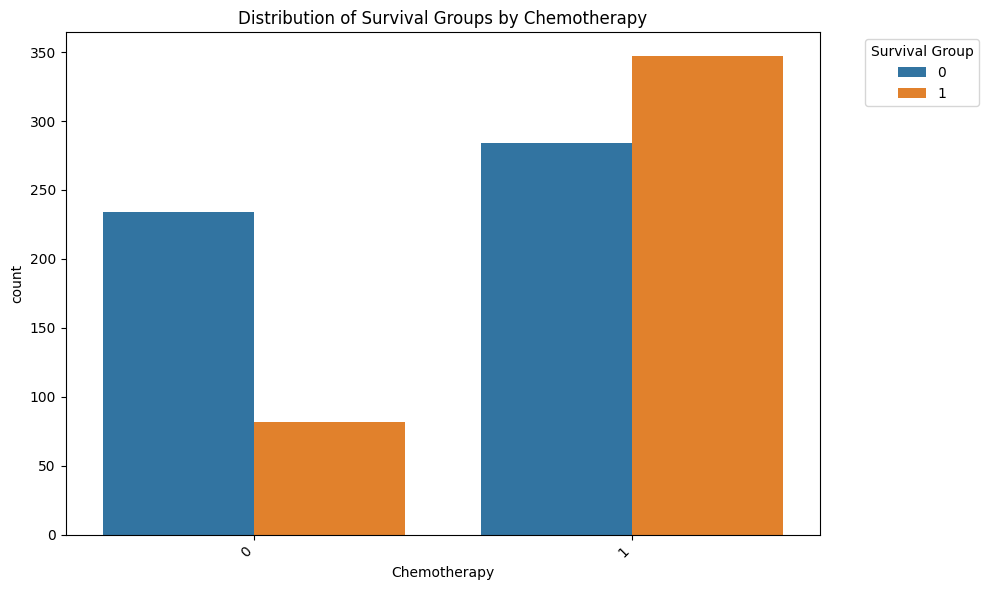

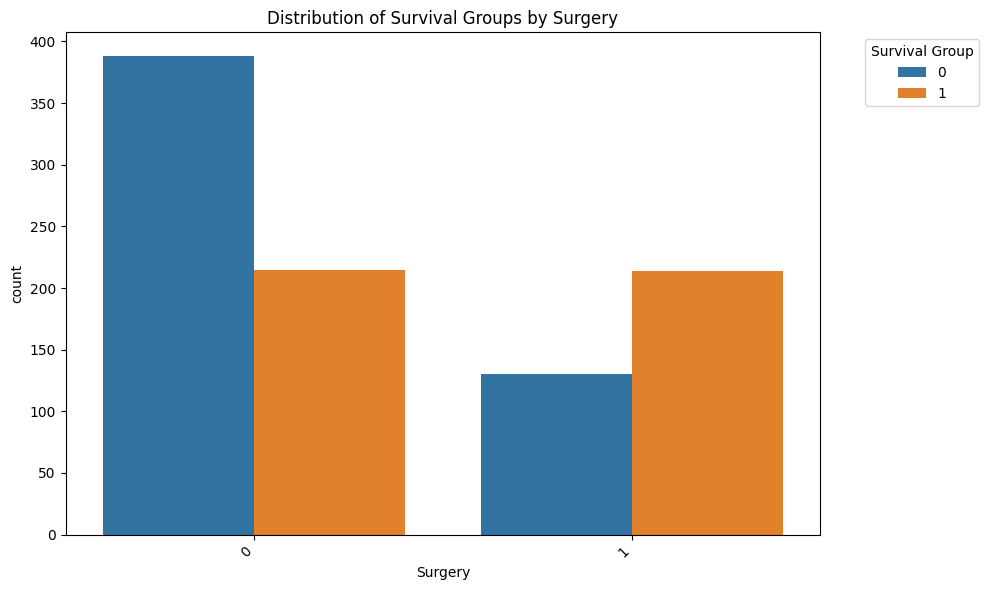

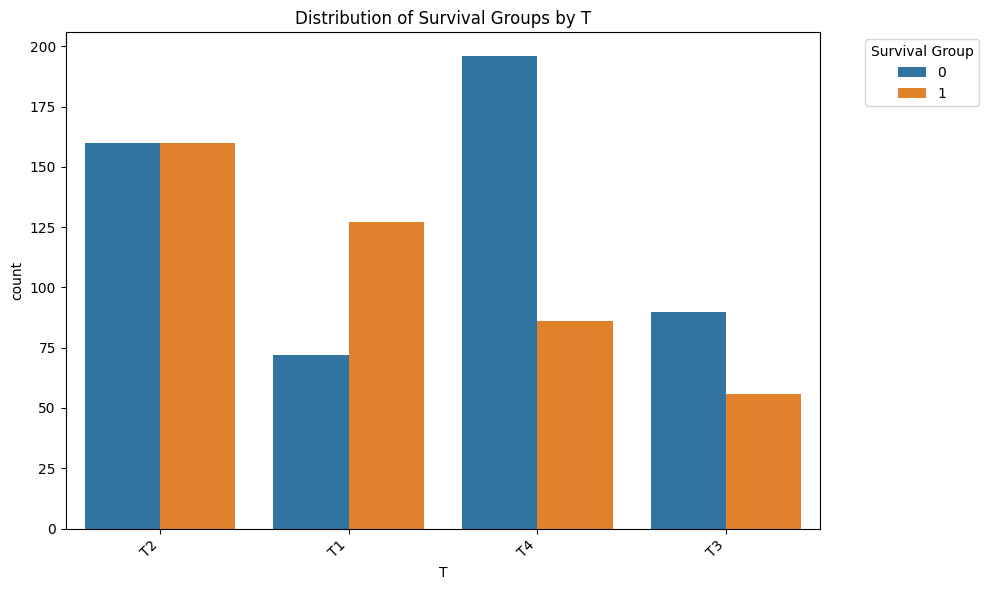

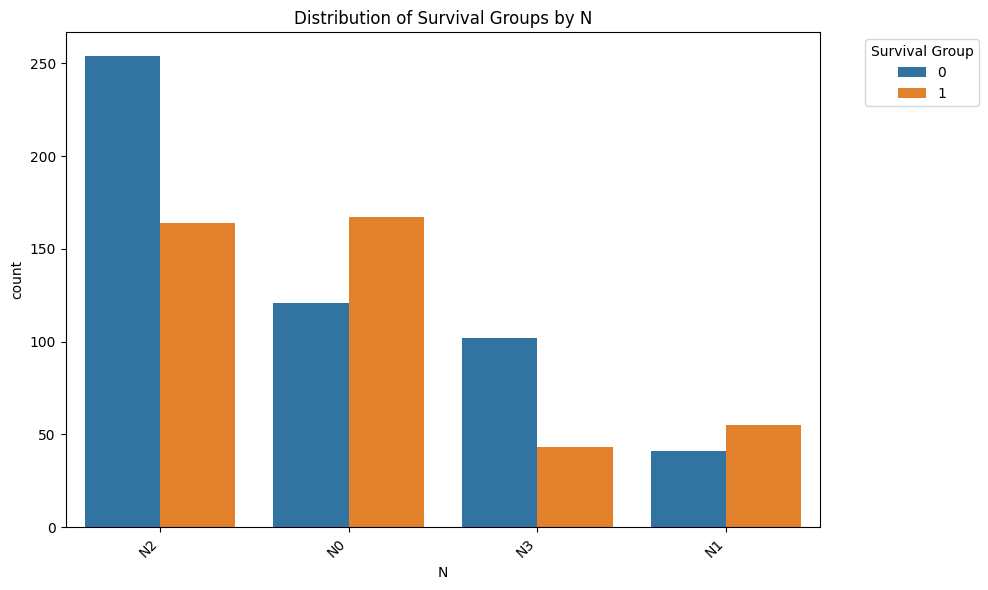

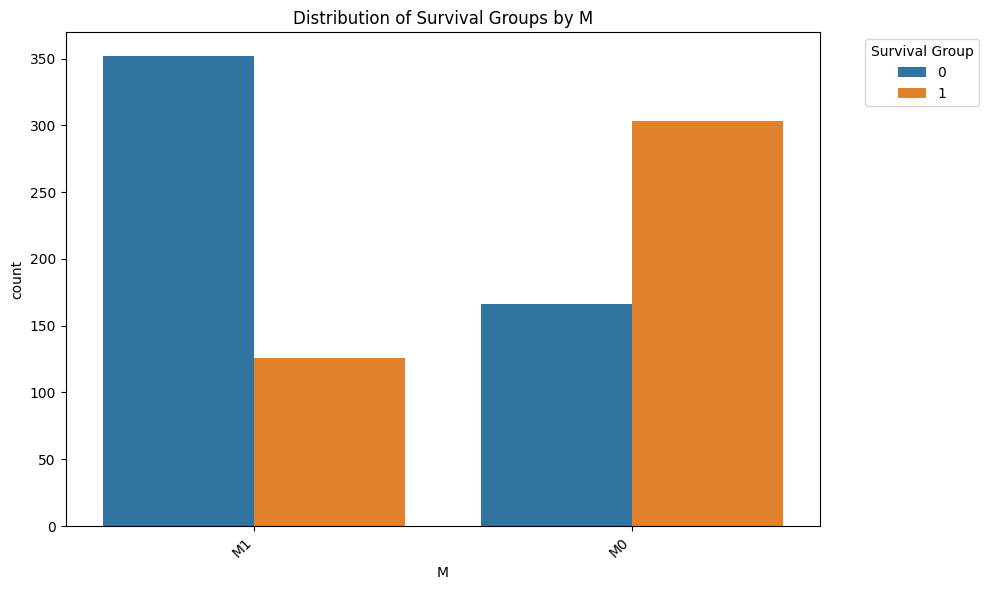

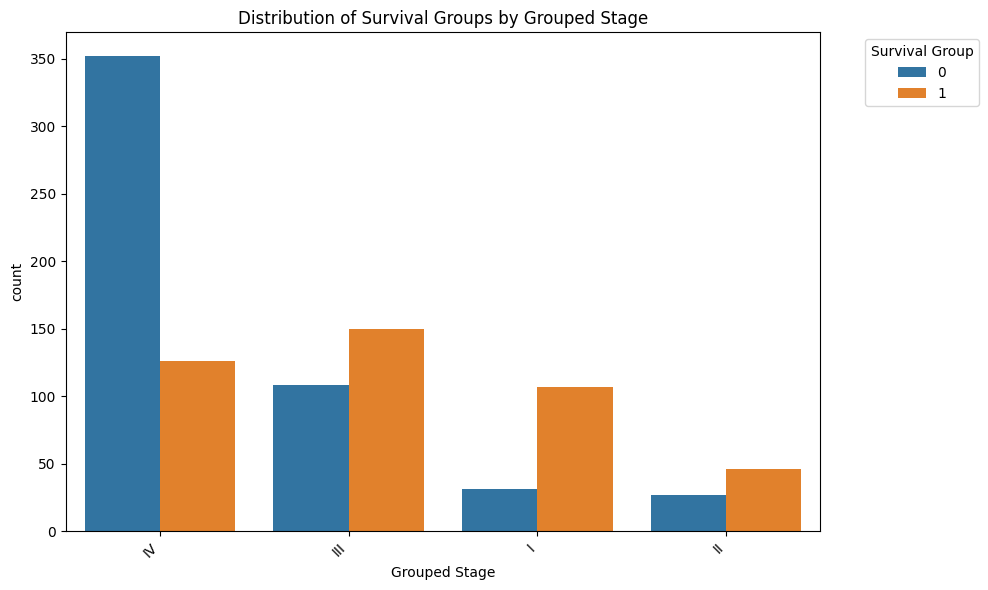

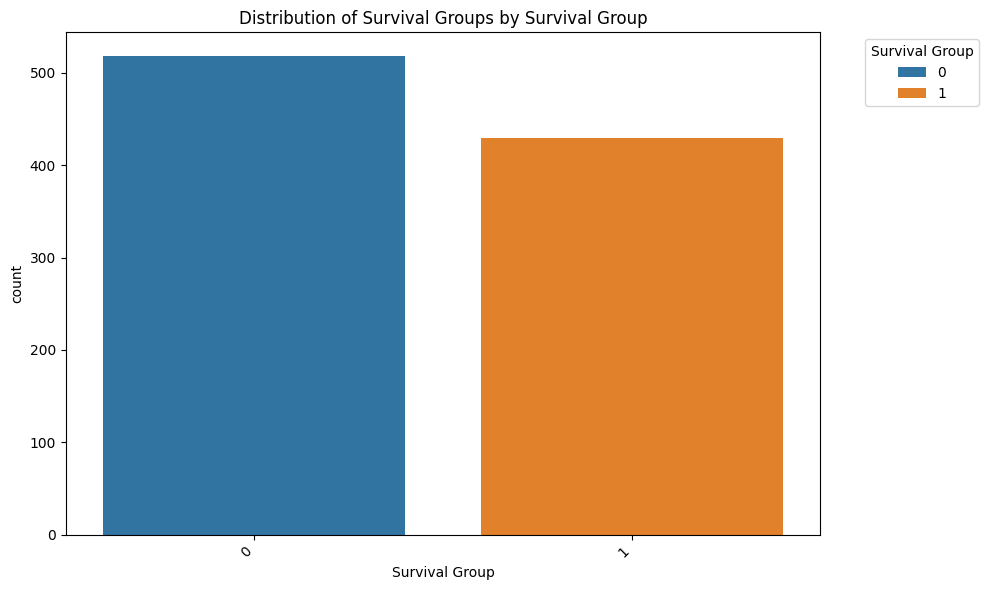

In [29]:
# Exclude specific columns from visualization
columns_to_exclude = ['Patient ID', 'Histologic Type ICD-O-3', 'Survival Months'] # Now also excluding 'Survival Months'
features = df.drop(columns=columns_to_exclude)

# Visualizing the distribution of survival groups across different features
for column in features.columns:
    if df[column].dtype == 'object' or len(df[column].unique()) < 10:  # Assuming it's categorical
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, hue='Survival Group', data=df)
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Distribution of Survival Groups by {column}')
        plt.legend(title='Survival Group', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    else:
        # For numerical features, you might bin them or consider another way to categorize
        # This is a placeholder for any specific handling you might want
        pass

Counts and percentages of unique values in Survival Group:
                Count  Percentage
Survival Group                   
0                 518    54.69905
1                 429    45.30095


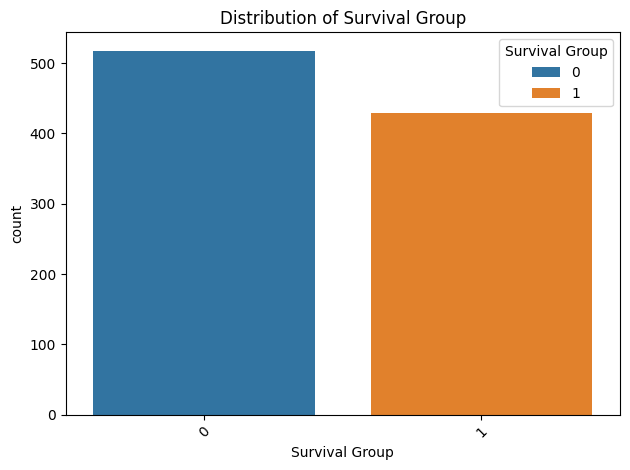

In [30]:
data_exploration(df, 'Survival Group')

In [31]:
# check missing values
df.isnull().sum()

Patient ID                 0
Histologic Type ICD-O-3    0
Year of diagnosis          0
Sex                        0
Race                       0
Radiation recode           0
Age                        0
Marital Status             0
Chemotherapy               0
Surgery                    0
T                          0
N                          0
M                          0
Grouped Stage              0
Tumor Size                 0
Survival Months            0
Survival Group             0
dtype: int64

In [32]:
# drop Patient ID,Histologic Type ICD-O-3,Year of diagnosis,Survival Months
df = df.drop(['Patient ID','Histologic Type ICD-O-3','Year of diagnosis','Survival Months'], axis=1)

In [33]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sex               947 non-null    object
 1   Race              947 non-null    object
 2   Radiation recode  947 non-null    int64 
 3   Age               947 non-null    object
 4   Marital Status    947 non-null    object
 5   Chemotherapy      947 non-null    int64 
 6   Surgery           947 non-null    int64 
 7   T                 947 non-null    object
 8   N                 947 non-null    object
 9   M                 947 non-null    object
 10  Grouped Stage     947 non-null    object
 11  Tumor Size        947 non-null    int64 
 12  Survival Group    947 non-null    int64 
dtypes: int64(5), object(8)
memory usage: 96.3+ KB


In [34]:
# binary encoding for Sex
df['Sex'] = df['Sex'].map({'Female': 0, 'Male': 1})

In [35]:
df['Race'].value_counts(dropna=False)

Race
White                            809
Black                             96
Asian or Pacific Islander         33
American Indian/Alaska Native      9
Name: count, dtype: int64

In [36]:
df['Radiation recode'].value_counts(dropna=False)

Radiation recode
0    521
1    426
Name: count, dtype: int64

In [37]:
df['Age'].value_counts(dropna=False).sort_index()

Age
35-49 years     31
50-54 years     50
55-59 years     91
60-64 years    130
65-69 years    181
70-74 years    189
75-79 years    143
80-84 years     95
85+ years       37
Name: count, dtype: int64

In [38]:
# a loop to convert all object columns to category
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

In [39]:
df.dtypes

Sex                    int64
Race                category
Radiation recode       int64
Age                 category
Marital Status      category
Chemotherapy           int64
Surgery                int64
T                   category
N                   category
M                   category
Grouped Stage       category
Tumor Size             int64
Survival Group         int64
dtype: object

In [40]:
# one hot encoding for all category columns
df = pd.get_dummies(df, drop_first=True)

# make the true and false to 1 and 0 for all columns
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Sex                                    947 non-null    int64
 1   Radiation recode                       947 non-null    int64
 2   Chemotherapy                           947 non-null    int64
 3   Surgery                                947 non-null    int64
 4   Tumor Size                             947 non-null    int64
 5   Survival Group                         947 non-null    int64
 6   Race_Asian or Pacific Islander         947 non-null    int64
 7   Race_Black                             947 non-null    int64
 8   Race_White                             947 non-null    int64
 9   Age_50-54 years                        947 non-null    int64
 10  Age_55-59 years                        947 non-null    int64
 11  Age_60-64 years                 

In [41]:
df['Tumor Size'].describe()

count    947.000000
mean      46.904963
std       29.427473
min        1.000000
25%       25.000000
50%       40.000000
75%       62.000000
max      157.000000
Name: Tumor Size, dtype: float64

## Data Splitting

In [42]:
X = df.drop('Survival Group', axis=1)
y = df['Survival Group']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=66, stratify=y)

from sklearn.preprocessing import StandardScaler
# Fit the scaler to the "Tumor Size" column in the training data
scaler = StandardScaler()
scaler.fit(X_train[["Tumor Size"]])
# Transform the "Tumor Size" column in the training and testing data
X_train["Tumor Size"] = scaler.transform(X_train[["Tumor Size"]])
X_test["Tumor Size"] = scaler.transform(X_test[["Tumor Size"]])


In [43]:
# check shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((662, 29), (285, 29), (662,), (285,))

In [ ]:
# save the train and test data
X_train.to_csv('Data/X_train.csv', index=False)
X_test.to_csv('Data/X_test.csv', index=False)
y_train.to_csv('Data/y_train.csv', index=False)
y_test.to_csv('Data/y_test.csv', index=False)

In [54]:
from sklearn.metrics import make_scorer, fbeta_score

f2_scorer = make_scorer(fbeta_score, beta=2)

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


# Define the parameter grid
param_dist = {
    'max_depth': range(3, 25),
    'min_samples_leaf': range(5, 100),
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'ccp_alpha': np.linspace(0, 1, 100)
}

# Decision Tree classifier
dt = DecisionTreeClassifier()

# Random search with cross-validation
random_search = RandomizedSearchCV(dt, param_dist, n_iter=100, scoring=f2_scorer, 
                                   cv=10, random_state=66, n_jobs=-1, verbose=1)

# Fit the model
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.212121...
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(3, 25),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': range(5, 100)},
                   random_state=66, scoring=make_scorer(fbeta_score, beta=2),
                   verbose=1)

9

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

# predict on the test set
y_pred = random_search.predict(X_test)

# print the train and test scores, confusion matrix, classification report
print(f'Train score: {random_search.best_score_:.4f}')
print(f'Test score: {random_search.score(X_test, y_test):.4f}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train score: 0.6985
Test score: 0.6794
[[106  50]
 [ 40  89]]
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       156
           1       0.64      0.69      0.66       129

    accuracy                           0.68       285
   macro avg       0.68      0.68      0.68       285
weighted avg       0.69      0.68      0.68       285



12

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

# predict on the test set
y_pred = random_search.predict(X_test)

# print the train and test scores, confusion matrix, classification report
print(f'Train score: {random_search.best_score_:.4f}')
print(f'Test score: {random_search.score(X_test, y_test):.4f}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train score: 0.6668
Test score: 0.6960
[[112  74]
 [ 23  76]]
              precision    recall  f1-score   support

           0       0.83      0.60      0.70       186
           1       0.51      0.77      0.61        99

    accuracy                           0.66       285
   macro avg       0.67      0.68      0.65       285
weighted avg       0.72      0.66      0.67       285



6

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# predict on the test set
y_pred = random_search.predict(X_test)

# print the train and test scores, confusion matrix, classification report
print(f'Train score: {random_search.best_score_:.4f}')
print(f'Test score: {random_search.score(X_test, y_test):.4f}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train score: 0.9025
Test score: 0.8684
[[ 35  78]
 [ 11 161]]
              precision    recall  f1-score   support

           0       0.76      0.31      0.44       113
           1       0.67      0.94      0.78       172

    accuracy                           0.69       285
   macro avg       0.72      0.62      0.61       285
weighted avg       0.71      0.69      0.65       285

